In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Downloads/archive (1)/amazon_prime_users.csv')

In [21]:
data.sample(5)


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
137,138,Jesus Brown,zlee@example.net,zlee,1958-12-03,Female,South Dave,2024-03-24,2025-03-24,Annual,Amex,Manual,Occasional,Electronics,Documentary,Tablet,Medium,3.0,4
879,880,Derek Rogers,wilcoxsarah@example.com,wilcoxsarah,1975-06-30,Male,Lake Joshua,2024-01-17,2025-01-16,Annual,Mastercard,Manual,Regular,Clothing,Drama,Smartphone,Low,4.1,2
2190,2191,David Wood,wward@example.net,wward,1991-03-24,Male,Harrisonton,2024-01-12,2025-01-11,Monthly,Visa,Manual,Occasional,Electronics,Documentary,Smart TV,High,4.0,7
2479,2480,Mckenzie Nelson,martinezamber@example.net,martinezamber,1947-07-27,Male,Lake Gabrielle,2024-02-04,2025-02-03,Annual,Amex,Auto-renew,Occasional,Books,Action,Smartphone,High,4.2,6
1249,1250,Douglas Thomas,jasonrasmussen@example.com,jasonrasmussen,1937-05-22,Male,Carolville,2024-03-04,2025-03-04,Monthly,Visa,Manual,Frequent,Books,Sci-Fi,Smart TV,Medium,3.5,2


In [23]:
data.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [35]:
data.count()

User ID                          2500
Name                             2500
Email Address                    2500
Username                         2500
Date of Birth                    2500
Gender                           2500
Location                         2500
Membership Start Date            2500
Membership End Date              2500
Subscription Plan                2500
Payment Information              2500
Renewal Status                   2500
Usage Frequency                  2500
Purchase History                 2500
Favorite Genres                  2500
Devices Used                     2500
Engagement Metrics               2500
Feedback/Ratings                 2500
Customer Support Interactions    2500
dtype: int64

In [27]:
data.isnull().sum()

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64

In [31]:
print(f"Dataset contains {data.duplicated().sum()} Duplicate values")

Dataset contains 0 Duplicate values


In [37]:
data.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


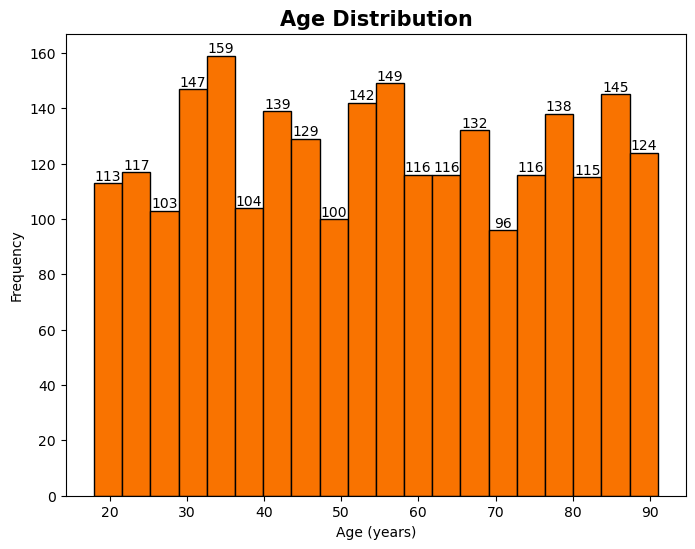

In [41]:
# 1. Demographic Analysis 
# Age Calculation 

from dateutil.relativedelta import relativedelta
data["Date of Birth"]=pd.to_datetime(data["Date of Birth"])
today=pd.Timestamp("today").normalize()
data["Age (yrs)"]=data['Date of Birth'].apply(lambda dob:relativedelta(today,dob).years)

data=data.reindex(columns=['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth','Age (yrs)',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions','TLD'])

plt.figure(figsize=(8, 6))
counts, bins, bars = plt.hist(data["Age (yrs)"], bins=20, color='#F97300', edgecolor='black')
for count, bar in zip(counts, bars):
    plt.text(bar.get_x() + bar.get_width() / 2, count, int(count), ha='center', va='bottom')

plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution',fontsize=15, fontweight='bold')
plt.show()

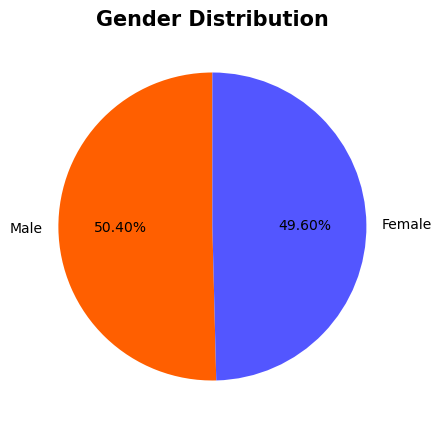

In [43]:
# Gender Distribution 
gender_count=data["Gender"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF5F00', '#5356FF', '#99ff99', '#ffcc99'])
plt.title('Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

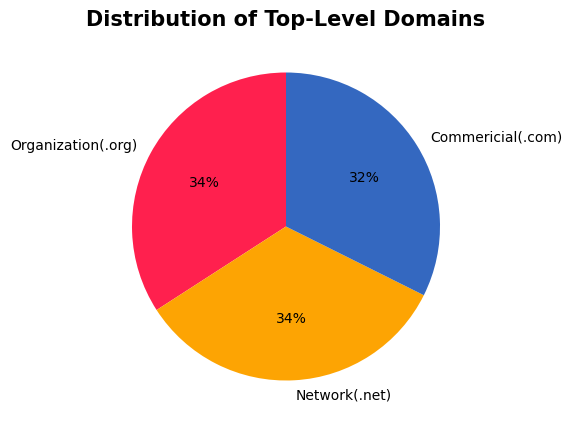

In [45]:
# Distribution of email-adresses

tlds=data["Email Address"].str.split(".",expand=True)

data["TLD"]=tlds[1]
data["TLD"]=data["TLD"].replace({"com":"Commericial(.com)","net":"Network(.net)","org":"Organization(.org)"})


tld_count=data["TLD"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(tld_count, labels=tld_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Distribution of Top-Level Domains', fontsize=15, fontweight='bold')
plt.show()

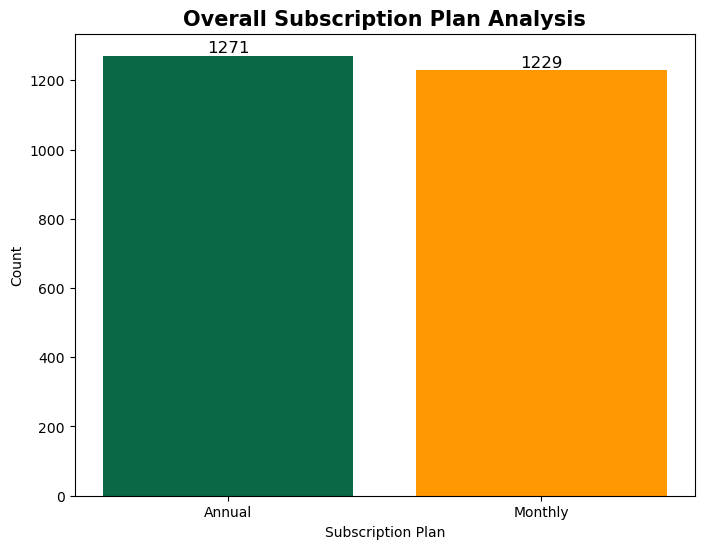

In [47]:
# 2. Membership and Subscription Analysis

# Subscription Plan 

# Overall Subscription Plan Analysis

plan_count = data['Subscription Plan'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(plan_count.index, plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.title('Overall Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

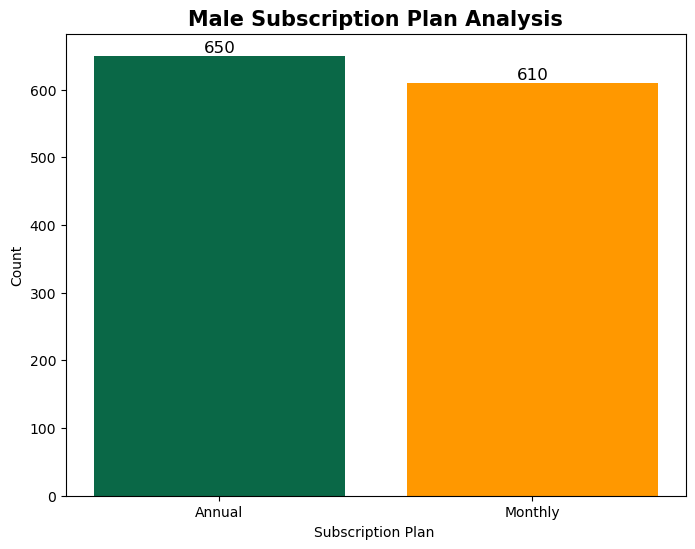

In [53]:
# Male Subscription Plan Analysis

men_plan_count=data.loc[data["Gender"]=="Male",'Subscription Plan'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(men_plan_count.index, men_plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan ')
plt.ylabel('Count')
plt.title('Male Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

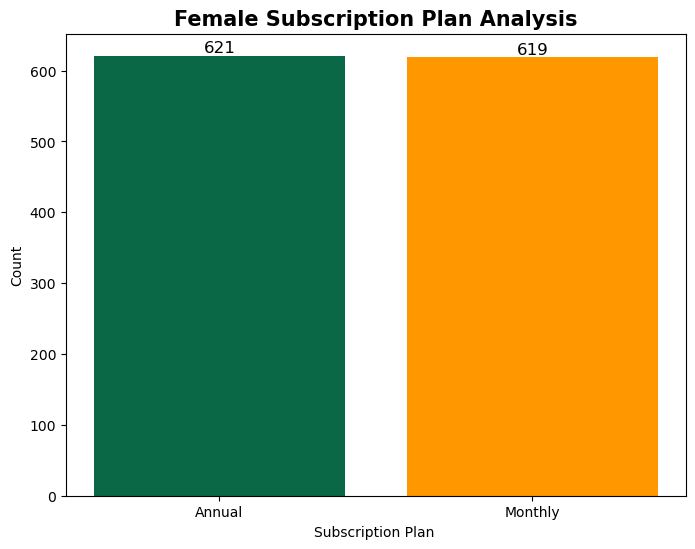

In [55]:
# Female Subscription Plan Analysis

women_plan_count=data.loc[data["Gender"]=="Female",'Subscription Plan'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(women_plan_count.index, women_plan_count, color=['#0A6847', '#FF9800', '#99ff99', '#ffcc99'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Subscription Plan ')
plt.ylabel('Count')
plt.title('Female Subscription Plan Analysis', fontsize=15, fontweight='bold')
plt.show()

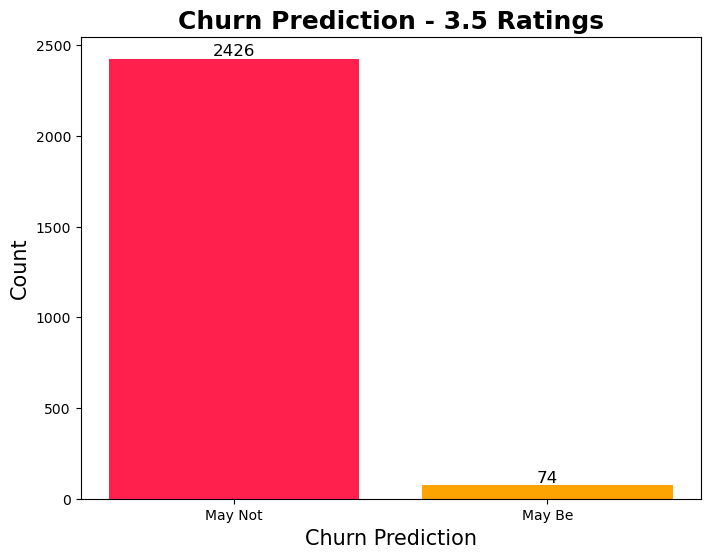

In [57]:
# Churn Analysis & Prediction

data["Churn Prediction"]="May Not"

cond_1=data["Usage Frequency"]=="Occasional"
cond_2=data["Engagement Metrics"]=='Low'
cond_3=data["Feedback/Ratings"]<3.6

# Churn Prediction for Ratings-3.5

data.loc[(cond_1)&(cond_2)&(cond_3),"Churn Prediction"]="May Be"

churn_count=data["Churn Prediction"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_count.index, churn_count, color=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Churn Prediction', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Churn Prediction - 3.5 Ratings', fontsize=18, fontweight='bold')
plt.show()

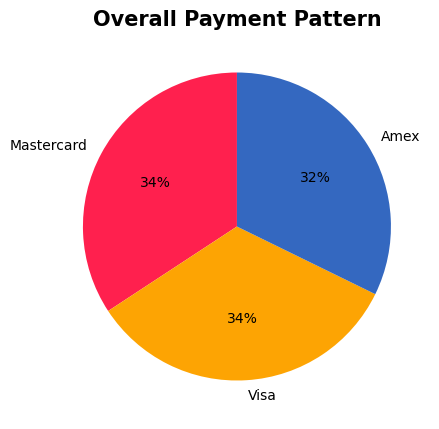

In [59]:
# 3. Payment Analysis 

# Payment Patterns

data["Payment Information"].value_counts()

# Overall Payment Pattern 

pay_count=data["Payment Information"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(pay_count, labels=pay_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Payment Pattern', fontsize=15, fontweight='bold')
plt.show()

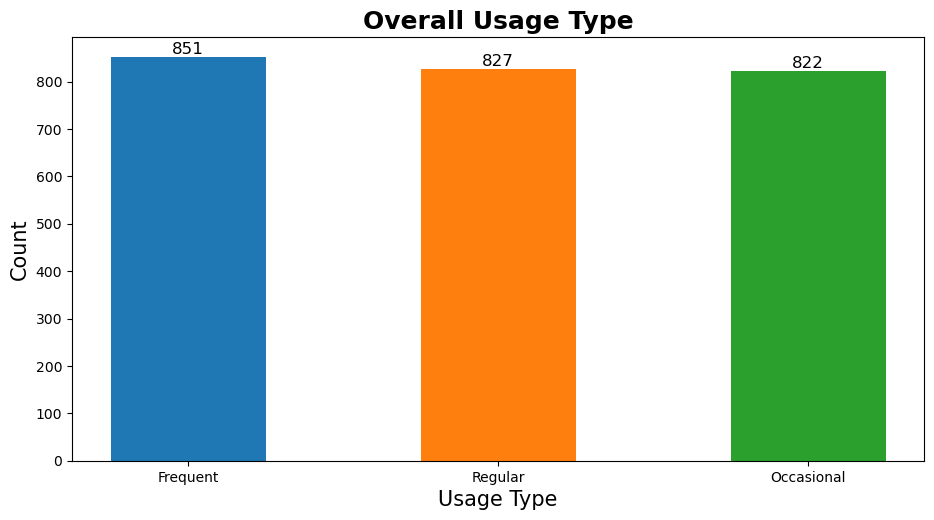

In [61]:
# 4. User Activity and Engagement

# Usage Patterns 

data["Usage Frequency"].value_counts()

# Overall Usage Type 

usage_count=data["Usage Frequency"].value_counts()
plt.figure(figsize=(11, 5.5))
bars = plt.bar(usage_count.index, usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Usage Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Overall Usage Type', fontsize=18, fontweight='bold')
plt.show()

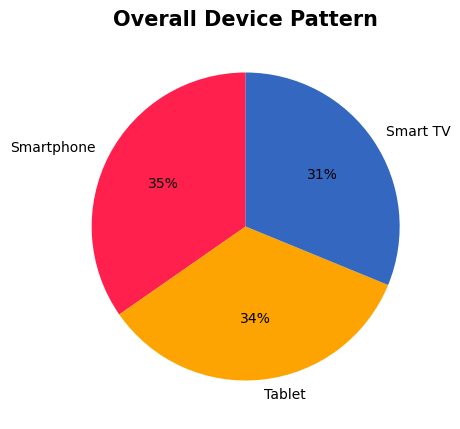

In [63]:
# Device Analysis

# Overall Device Analysis 

data["Devices Used"].value_counts()

device_count=data["Devices Used"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(device_count, labels=device_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Device Pattern', fontsize=15, fontweight='bold')
plt.show()

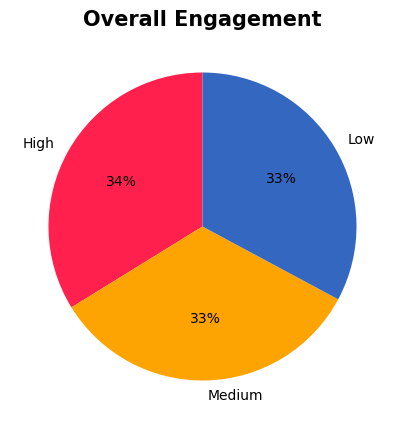

In [65]:
# Engagement Metrics

data["Engagement Metrics"].value_counts()

# Overall Engagement

engagement_count=data["Engagement Metrics"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(engagement_count, labels=engagement_count.index, autopct='%1.0f%%', startangle=90, colors=['#FF204E', '#FDA403', '#3468C0', '#ffcc99'])
plt.title('Overall Engagement', fontsize=15, fontweight='bold')
plt.show()

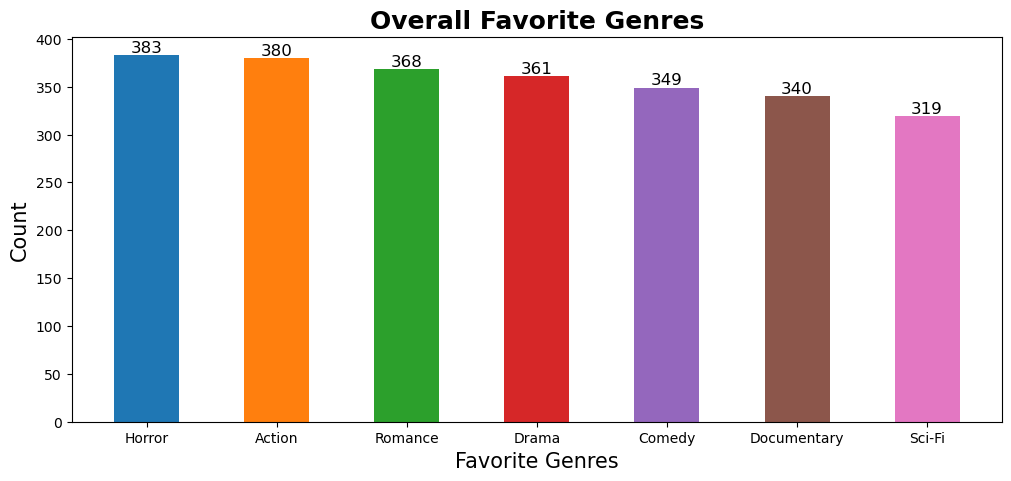

In [67]:
# 5. Content Preferences

# Genre Popularity

data["Favorite Genres"].value_counts()

# Overall Genre Analysis

genre_count = data["Favorite Genres"].value_counts()
plt.figure(figsize=(12, 5))
bars = plt.bar(genre_count.index, genre_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Overall Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

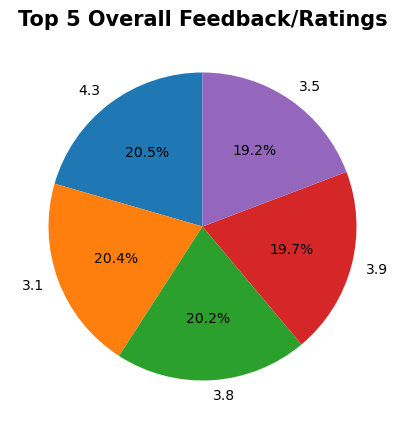

In [69]:
# 6. Customer Satisfaction and Support

data["Feedback/Ratings"].value_counts()

# Top 5 Overall Feedback/Ratings

feedback_count = data["Feedback/Ratings"].value_counts().nlargest(5)
plt.figure(figsize=(5, 5))
plt.pie(feedback_count, labels=feedback_count.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Top 5 Overall Feedback/Ratings', fontsize=15, fontweight='bold')
plt.show()

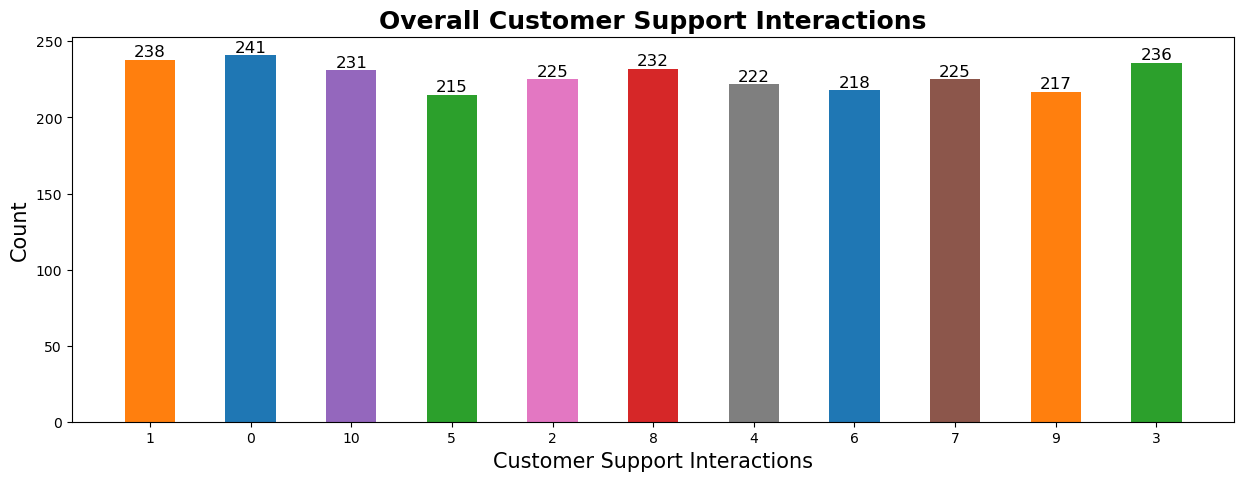

In [71]:
data["Customer Support Interactions"].value_counts()

support_interaction_count = data["Customer Support Interactions"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(support_interaction_count.index, support_interaction_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Customer Support Interactions', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Overall Customer Support Interactions', fontsize=18, fontweight='bold')
plt.xticks(ticks=range(len(support_interaction_count.index)), labels=support_interaction_count.index)
plt.show()


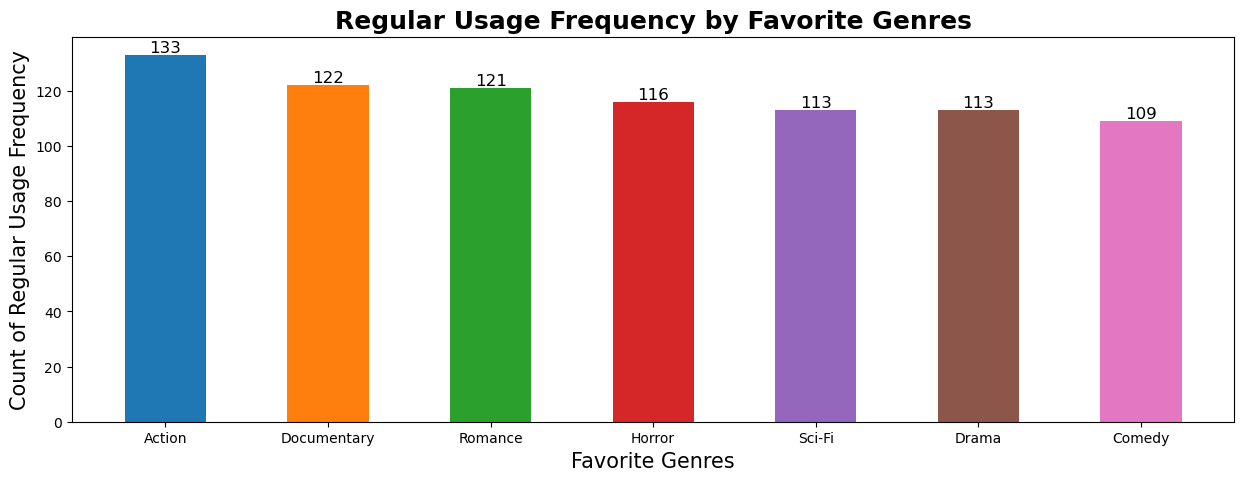

In [75]:
# Usage Frequency by Favorite Genres 

# Regular Usage Frequency by Favorite Genres

regular_usage_count = data.loc[data["Usage Frequency"] == "Regular","Favorite Genres"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(regular_usage_count.index, regular_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count of Regular Usage Frequency', fontsize=15)
plt.title('Regular Usage Frequency by Favorite Genres', fontsize=18, fontweight='bold')
plt.show()

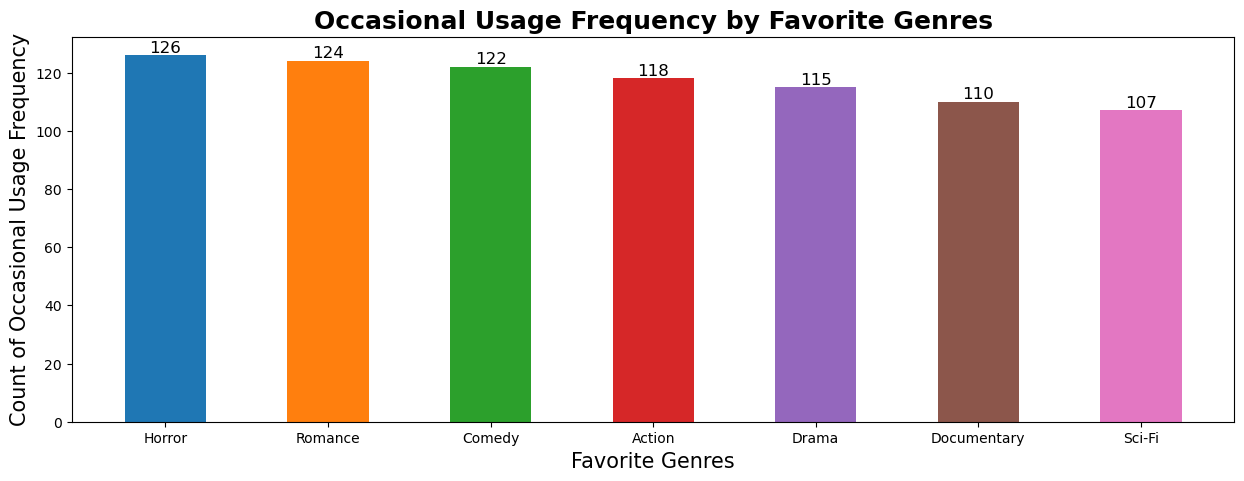

In [79]:
# Occasional Usage Frequency by Favorite Genres

occasional_usage_count = data.loc[data["Usage Frequency"] == "Occasional", "Favorite Genres"].value_counts()

plt.figure(figsize=(15, 5))
bars = plt.bar(occasional_usage_count.index, occasional_usage_count, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', color='black', fontsize=12)

plt.xlabel('Favorite Genres', fontsize=15)
plt.ylabel('Count of Occasional Usage Frequency', fontsize=15)
plt.title('Occasional Usage Frequency by Favorite Genres', fontsize=18, fontweight='bold')
plt.show()